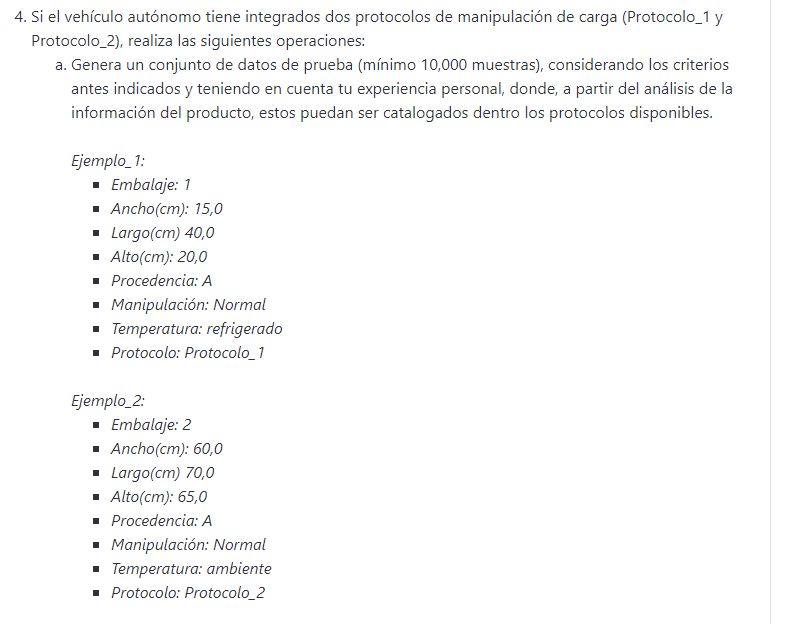

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("DatosFase2.csv")

In [5]:
df.shape

(10000, 9)

In [6]:
df.head()

,Tipo_embalaje,Peso,Tipo_manipulacion,Lugar_procedencia,Temp_almacenamiento,Largo,Ancho,Altura,Protocolo
0,2,14.2,1,2,1,86,12,12,2
1,3,165.2,1,2,1,62,92,95,2
2,1,245.8,1,4,2,28,19,17,1
3,3,13.6,1,3,2,63,53,22,1
4,3,78.2,1,3,2,58,33,55,1


In [7]:
from sklearn.model_selection import train_test_split

[Iloc pandas](https://www.analyticslane.com/2019/06/21/seleccionar-filas-y-columnas-en-pandas-con-iloc-y-loc/)

In [8]:
df2 = df.copy()

In [9]:
x = df2.iloc[:,0:8].to_numpy()
y = df2.iloc[:,-1].to_numpy()

In [11]:
x.shape

(10000, 8)

In [12]:
y.shape

(10000,)

In [10]:
from sklearn.preprocessing import StandardScaler
# Normalizamos los datos
scaler = StandardScaler()
datosNormalizados = scaler.fit_transform(x)

In [76]:
datosNormalizados.shape

(10000, 8)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [15]:
arbol_decision = DecisionTreeClassifier(random_state=10)

In [16]:
modelo=arbol_decision.fit(x_train, y_train)

In [17]:
y_pred = arbol_decision.predict(x_test)
y_pred

array([1, 2, 2, ..., 2, 2, 2])

In [18]:
y_test

array([1, 2, 2, ..., 2, 2, 2])

In [19]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Valor Predecido')

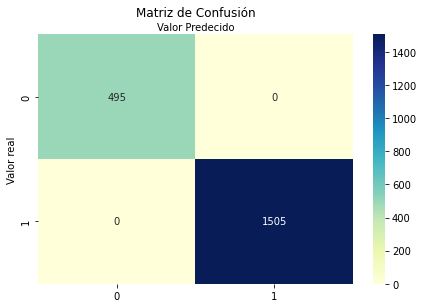

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor Predecido')


1.   OVERSAMPLING
2.   UNDERSAMPLING



#Vemos que esta sobre ajustado

In [21]:
df2["Protocolo"].value_counts()

2    7478
1    2522
Name: Protocolo, dtype: int64

In [22]:
arbol_decision.score(x_train,y_train)

1.0

In [23]:
print("Aciertos:",metrics.accuracy_score(y_test, y_pred))
print("Precisión:",metrics.precision_score(y_test, y_pred))

Aciertos: 1.0
Precisión: 1.0


#Empezamos a crear data fake para reparar el sobreAjustado

In [77]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [78]:
print("antes del replazo:",Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(datosNormalizados,y)
# summarize class distribution
print("Despues remplazo:",Counter(y_over))

antes del replazo: Counter({2: 7478, 1: 2522})
Despues remplazo: Counter({2: 7478, 1: 7478})


In [79]:
x_train2,x_test2,y_train2,y_test2=train_test_split(X_over,y_over,test_size=0.2,random_state=0)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
modelo = LogisticRegression()

In [82]:
modeloEntrenado = modelo.fit(x_train2,y_train2)

In [83]:
y_pred2 = arbol_decision.predict(x_test2)

In [98]:
y_pred2.shape

(2992,)

In [99]:
y_pred2.shape

(2992,)

In [84]:
cnf_matrix = metrics.confusion_matrix(y_test2, y_pred2)

Text(0.5, 257.44, 'Valor Predecido')

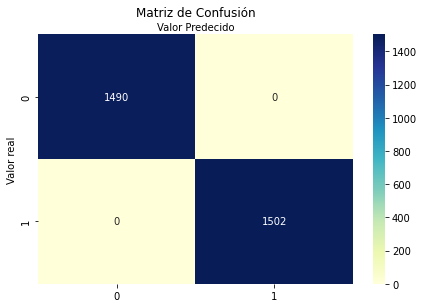

In [85]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor Predecido')

In [86]:
print("Aciertos:",metrics.accuracy_score(y_test2, y_pred2))
print("Precisión:",metrics.precision_score(y_test2, y_pred2))

Aciertos: 1.0
Precisión: 1.0


In [97]:
modeloEntrenado.score(x_test2,y_test2)

1.0